In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

diabetes=datasets.load_diabetes()

In [2]:
#['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [3]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [4]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [2]:
#we picked the data of the diabetes and kept it in the diabetes_X where we gave the new axis and selected the index of 2 from our diabetes data.
#X is our features
diabetes_X=diabetes.data[:,np.newaxis,2]
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [3]:
#from the diabetes_X we are picking the data from starting to end excluding the last 30 data to train our model
diabetes_X_Train=diabetes_X[:-30]
diabetes_X_Train

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [4]:
#we picked the last 20 data
diabetes_X_Test=diabetes_X[-20:]
diabetes_X_Test

array([[ 0.07786339],
       [-0.03961813],
       [ 0.01103904],
       [-0.04069594],
       [-0.03422907],
       [ 0.00564998],
       [ 0.08864151],
       [-0.03315126],
       [-0.05686312],
       [-0.03099563],
       [ 0.05522933],
       [-0.06009656],
       [ 0.00133873],
       [-0.02345095],
       [-0.07410811],
       [ 0.01966154],
       [-0.01590626],
       [-0.01590626],
       [ 0.03906215],
       [-0.0730303 ]])

In [5]:
#Y is our labels
diabetes_Y_Train=diabetes.target[:-30]
diabetes_Y_Test=diabetes.target[-20:]

In [6]:
model=linear_model.LinearRegression()

In [7]:
#here we trained our data
model.fit(diabetes_X_Train,diabetes_Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#we predicted the Y test by giving the features or the X
diabetes_Y_Predicted=model.predict(diabetes_X_Test)

In [9]:
print(diabetes_Y_Predicted)

[226.70014103 116.09940303 163.78962951 115.08471736 121.17283138
 158.71620116 236.84699773 122.18751705  99.86443231 124.21688839
 205.39174197  96.8203753  154.65745848 131.31968807  83.62946159
 171.90711487 138.42248776 138.42248776 190.17145692  84.64414726]


In [10]:
#now to find the mean squared error which we found in lecture to get the error
mean_squared_error(diabetes_Y_Test,diabetes_Y_Predicted)

2561.3204277283867

In [11]:
#this coef_ gives the weight or the value for the const since here we got only one feature so we have got only one const
#f(x)=c +c1x so c1 is given here
model.coef_

array([941.43097333])

In [12]:
#so this gives us the intercept: f(x)=c +c1x so c is given here
model.intercept_

153.39713623331698

(20,)

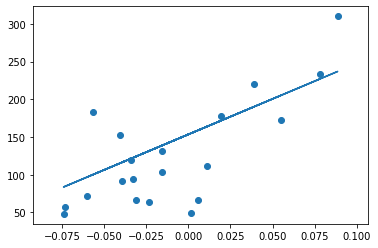

In [13]:
#now using the plt we will plot this graph

plt.scatter(diabetes_X_Test,diabetes_Y_Test)
plt.plot(diabetes_X_Test,diabetes_Y_Predicted)

In [ ]:
#if you want more features so remove the index 2 line in diabetes_X so now you will get 6 features and then u could get those intercepts and its coefs and rest of the things will remain same

Boston data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

boston=datasets.load_boston()

In [ ]:
#['data', 'target', 'feature_names', 'DESCR', 'filename'])

boston

In [ ]:
#data ma 13 features ha and 506 us ma rows ha and each have a 13 feature set
boston.data

In [ ]:
boston.target

In [ ]:
#data will be use to train the model
boston_X_train=boston.data[:-20]
boston_Y_train=boston.target[:-20]

In [ ]:
#data will be used to test the model
boston_X_test=boston.data[-20:]
boston_Y_test=boston.target[-20:]

In [ ]:
boston_model=linear_model.LinearRegression()

In [ ]:
boston_model.fit(boston_X_train,boston_Y_train)

In [ ]:
boston_Y_Predicted=boston_model.predict(boston_X_test)

In [ ]:
mean_squared_error(boston_Y_Predicted,boston_Y_test)

In [ ]:
boston_model.coef_

In [ ]:
boston_model.intercept_

In [ ]:
plt.plot(boston_Y_test)

In [ ]:
plt.plot(boston_Y_Predicted)

In [ ]:
#x values are 2d and y values are 1d

In [ ]:
data_X=np.array([[1],[2],[3]])
data_Y=np.array([3,2,4])

In [ ]:
data_X_train=data_X
data_X_test=data_X

In [ ]:
data_Y_train=data_Y
data_Y_test=data_Y

In [ ]:
model2=linear_model.LinearRegression()

In [ ]:
model2.fit(data_X_train,data_Y_train)

In [ ]:
predicted=model2.predict(data_X_test)
predicted

In [ ]:
model2.coef_

In [ ]:
model2.intercept_

In [ ]:
plt.scatter(data_X_test,data_Y)
plt.plot(data_X_test,predicted)

## Edureka Linear Regression

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)

In [ ]:
data=pd.read_csv('headbrain.csv')
data

In [ ]:
#we fetched the data by using the values which will make it the numpy array and then we will convert it into the 2d array by calling the reshape function becz linear regression needs the 2d array of the features or the X
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
m=len(X)
X=X.reshape((m,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_predicted=reg.predict(X)

In [ ]:
#here the reg.score gives us the method of determination of R**2
score=reg.score(X,Y)
score